In [13]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [14]:
from src.model_analyser import ModelAnalyser
from src.model.tcr_metric import BetaTcrdist

In [15]:
analyser = ModelAnalyser()
model = BetaTcrdist()

Running KnnAnalysis...
Running PrecisionRecallAnalysis...
Running PgenAnalysis...


/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Running MetricCalibrationAnalysis...


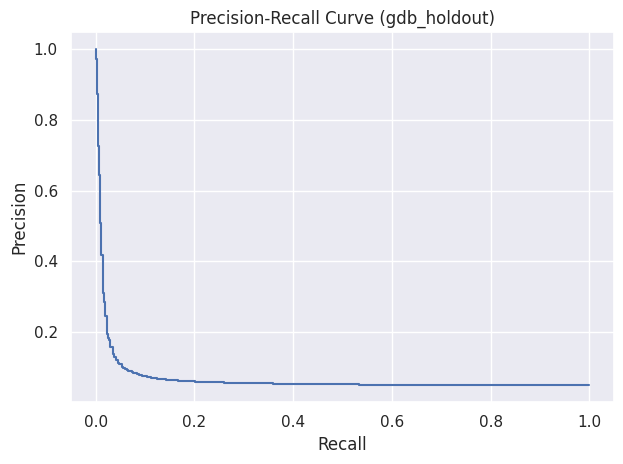

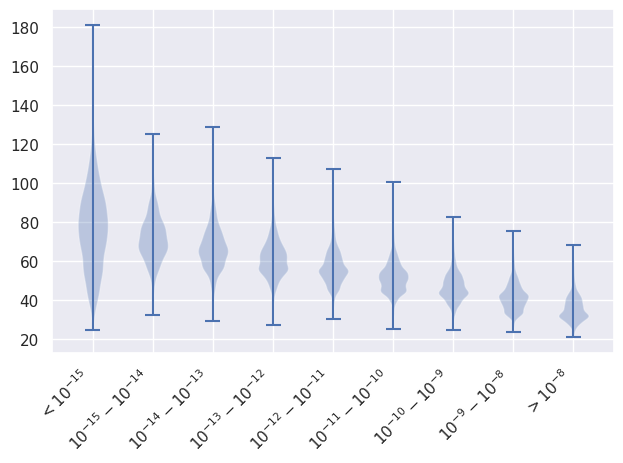

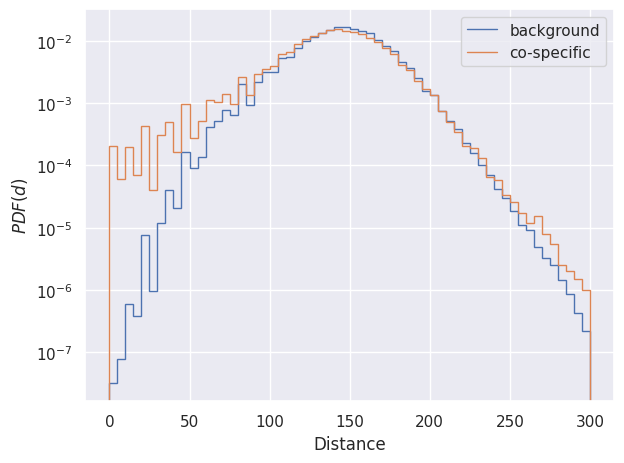

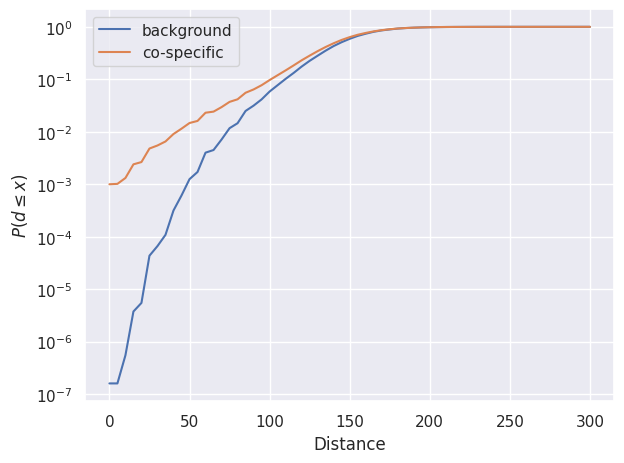

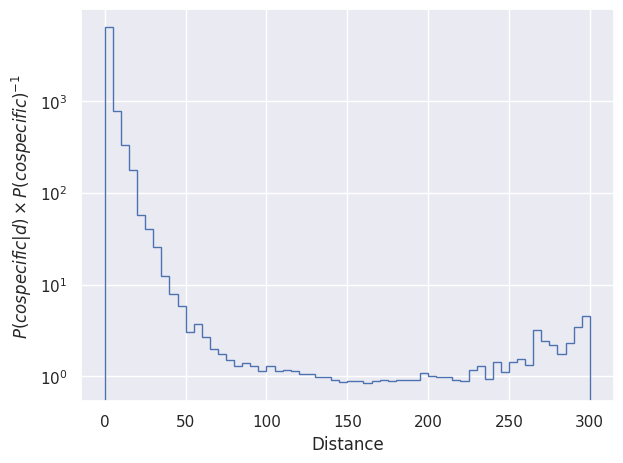

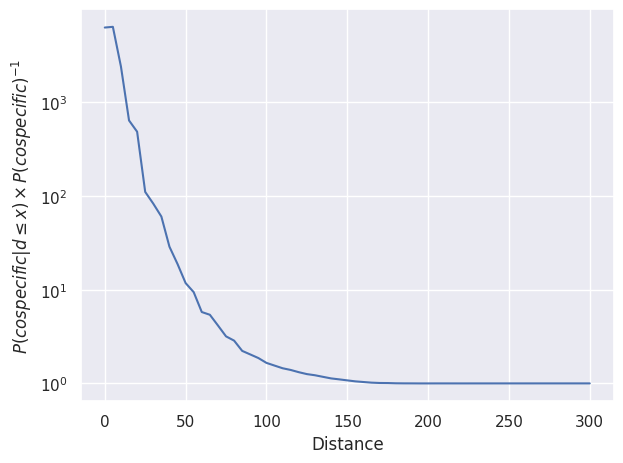

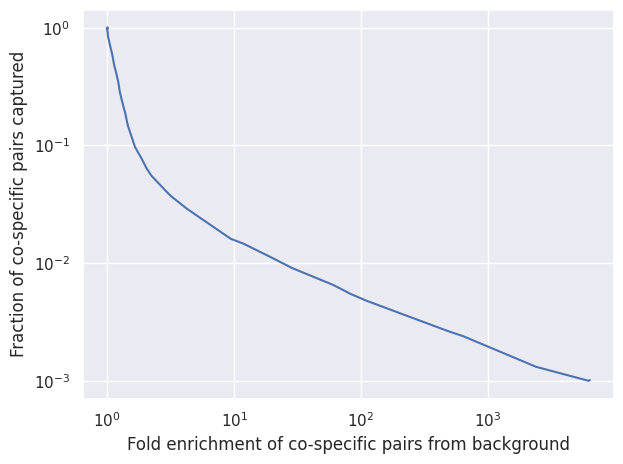

In [16]:
analyser.analyse(model)